<a href="https://colab.research.google.com/github/m-shilpa/END3/blob/main/Session_5_TorchText/S5_TorchText_AmazonReviewPolarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchtext.datasets import AmazonReviewPolarity

In [ ]:
help(AmazonReviewPolarity)

Help on function AmazonReviewPolarity in module torchtext.datasets.amazonreviewpolarity:

AmazonReviewPolarity(root='.data', split=('train', 'test'))
    AmazonReviewPolarity dataset
    
    Separately returns the train/test split
    
    Number of lines per split:
        train: 3600000
    
        test: 400000
    
    
    Number of classes
        2
    
    
    Args:
        root: Directory where the datasets are saved.
            Default: .data
        split: split or splits to be returned. Can be a string or tuple of strings.
            Default: ('train', 'test')



In [ ]:
test_iter = AmazonReviewPolarity(split='test')

negative_test_samples = 0
positive_test_samples = 0
for index, (label,text) in enumerate(test_iter):
    if label == 1:
        negative_test_samples +=1
    else:
        positive_test_samples +=1

print('Number of Positive reviews:',positive_test_samples)
print('Number of Negative reviews:',negative_test_samples)

Number of Positive reviews: 200000
Number of Negative reviews: 200000


In [ ]:
train_iter = AmazonReviewPolarity(split='train')

negative_train_samples = 0
positive_train_samples = 0
for index, (label,text) in enumerate(train_iter):
    if label == 1:
        negative_train_samples +=1
    else:
        positive_train_samples +=1

print('Number of Positive reviews:',positive_train_samples)
print('Number of Negative reviews:',negative_train_samples)

Number of Positive reviews: 1800000
Number of Negative reviews: 1800000


In [ ]:
train_iter = AmazonReviewPolarity(split='train')

In [ ]:
type(AmazonReviewPolarity(split='train'))

torchtext.data.datasets_utils._RawTextIterableDataset

In [ ]:
next(train_iter)

(2,
 'Stuning even for the non-gamer This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^')

In [ ]:
for (line_number, (label, line)) in enumerate(train_iter):
  print(label, line)
  if line_number == 19:
    break

2 The best soundtrack ever to anything. I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.
2 Amazing! This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the more if you've played the game) and the hope in "A Distant Promise" and "Girl who Stole the Star" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like "Chrono Cross ~ Time's Scar~", "Time of the Dreamwatch", and "Chronomantique" (indefinably remeniscent of Chrono Trigger) are all absolutely super

In [ ]:
from torch.utils.data import DataLoader
train_iter = AmazonReviewPolarity(split = 'train')

help(DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(typing.Generic)
 |  DataLoader(*args, **kwds)
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Args:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuffled
 |          at every epoch (default: ``False``).
 |      sampler (Sampler or Iterable, optional): defines the strategy to draw
 |          samples from the dataset. Can be any ``Iterable``

In [ ]:
dataloader = DataLoader(train_iter, batch_size=16, shuffle=False)

In [ ]:
next(iter(dataloader))

[tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1]),
 ('Stuning even for the non-gamer This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^',
  "The best soundtrack ever to anything. I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
help(get_tokenizer)

Help on function get_tokenizer in module torchtext.data.utils:

get_tokenizer(tokenizer, language='en')
    Generate tokenizer function for a string sentence.
    
    Args:
        tokenizer: the name of tokenizer function. If None, it returns split()
            function, which splits the string sentence by space.
            If basic_english, it returns _basic_english_normalize() function,
            which normalize the string first and split by space. If a callable
            function, it will return the function. If a tokenizer library
            (e.g. spacy, moses, toktok, revtok, subword), it returns the
            corresponding library.
        language: Default en
    
    Examples:
        >>> import torchtext
        >>> from torchtext.data import get_tokenizer
        >>> tokenizer = get_tokenizer("basic_english")
        >>> tokens = tokenizer("You can now install TorchText using pip!")
        >>> tokens
        >>> ['you', 'can', 'now', 'install', 'torchtext', 'using

In [ ]:
tokenizer = get_tokenizer("basic_english")

In [ ]:
tokens = tokenizer("You can now install TorchText using pip!")
tokens

['you', 'can', 'now', 'install', 'torchtext', 'using', 'pip', '!']

In [ ]:
help(build_vocab_from_iterator)

Help on function build_vocab_from_iterator in module torchtext.vocab.vocab_factory:

build_vocab_from_iterator(iterator: Iterable, min_freq: int = 1, specials: Union[List[str], NoneType] = None, special_first: bool = True) -> torchtext.vocab.vocab.Vocab
    Build a Vocab from an iterator.
    
    Args:
        iterator: Iterator used to build Vocab. Must yield list or iterator of tokens.
        min_freq: The minimum frequency needed to include a token in the vocabulary.
        specials: Special symbols to add. The order of supplied tokens will be preserved.
        special_first: Indicates whether to insert symbols at the beginning or at the end.
    
    
    Returns:
        torchtext.vocab.Vocab: A `Vocab` object
    
    Examples:
        >>> #generating vocab from text file
        >>> import io
        >>> from torchtext.vocab import build_vocab_from_iterator
        >>> def yield_tokens(file_path):
        >>>     with io.open(file_path, encoding = 'utf-8') as f:
        >>> 

In [ ]:
tokenizer = get_tokenizer("basic_english")
train_iter = AmazonReviewPolarity(split = 'train')

def yield_tokens(data_iter):
  for _, text in data_iter:
    yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])

In [ ]:
help(vocab)

Help on Vocab in module torchtext.vocab.vocab object:

class Vocab(torch.nn.modules.module.Module)
 |  Vocab(vocab)
 |  
 |  Base class for all neural network modules.
 |  
 |  Your models should also subclass this class.
 |  
 |  Modules can also contain other Modules, allowing to nest them in
 |  a tree structure. You can assign the submodules as regular attributes::
 |  
 |      import torch.nn as nn
 |      import torch.nn.functional as F
 |  
 |      class Model(nn.Module):
 |          def __init__(self):
 |              super(Model, self).__init__()
 |              self.conv1 = nn.Conv2d(1, 20, 5)
 |              self.conv2 = nn.Conv2d(20, 20, 5)
 |  
 |          def forward(self, x):
 |              x = F.relu(self.conv1(x))
 |              return F.relu(self.conv2(x))
 |  
 |  Submodules assigned in this way will be registered, and will have their
 |  parameters converted too when you call :meth:`to`, etc.
 |  
 |  :ivar training: Boolean represents whether this module is in tr

In [ ]:
vocab.set_default_index(vocab["<unk>"])

In [ ]:
vocab(['here', 'is', 'an', 'example', 'of', 'alien', 'invasion', 'they', 'are', 'called', 'bangalorites'])

[196, 12, 49, 715, 9, 2894, 7076, 36, 29, 532, 0]

In [ ]:
vocab["<unk>"]

0

In [ ]:
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x) - 1

In [ ]:
text_pipeline("Here is an exmaple of alient invasion, and they are called bangaloriters")

[196, 12, 49, 86649, 9, 363749, 7076, 3, 5, 36, 29, 532, 0]

In [ ]:
label_pipeline('19')

18

In [ ]:
from torch.utils.data import DataLoader
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def collate_fn(batch):
  src_batch, tgt_batch = [], []
  for src_batch, tgt_batch in batch:
    src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip('\n')))
    tgt_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip('\n')))
  src_batch = pad_sequences(src_batch, padding_value=PAD_IDX)
  tgt_batch = pad_sequences(tgt_batch, padding_value=PAD_IDX)
  return src_batch, tgt_batch

In [ ]:
weight = torch.randn(10, 5)
weight

tensor([[-1.5913, -0.9226, -0.4474, -1.4173, -1.0275],
        [-1.6253,  0.8147, -1.2453, -1.1690, -0.4868],
        [-0.5289, -0.3009,  0.0579, -1.0222, -0.5530],
        [-1.3009,  0.2044,  0.2302,  0.5459,  1.2826],
        [-0.7907, -1.6150,  1.1316,  1.2925, -0.0509],
        [ 1.4463, -0.2989, -0.7461,  0.4186, -1.7536],
        [ 0.8327, -0.1156, -0.1755, -0.9057, -0.9442],
        [ 0.0363, -1.2857, -0.0352,  1.0292,  0.3943],
        [ 0.5716,  0.3841,  0.9985,  0.2207, -0.8201],
        [-0.6137,  1.4114,  1.2859,  1.0841, -0.1835]])

In [ ]:
indices = torch.tensor([4, 1, 7])
indices

tensor([4, 1, 7])

In [ ]:
embeddings = torch.nn.functional.embedding(indices, weight)
embeddings

tensor([[-0.7907, -1.6150,  1.1316,  1.2925, -0.0509],
        [-1.6253,  0.8147, -1.2453, -1.1690, -0.4868],
        [ 0.0363, -1.2857, -0.0352,  1.0292,  0.3943]])

In [ ]:
embeddings.mean(dim=0, keepdim=True)

tensor([[-0.7932, -0.6953, -0.0496,  0.3842, -0.0478]])

In [ ]:
torch.nn.functional.embedding_bag(indices, weight, torch.tensor([0]), mode="mean")

tensor([[-0.7932, -0.6953, -0.0496,  0.3842, -0.0478]])

In [ ]:
def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
         label_list.append(label_pipeline(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)    

In [ ]:
train_iter = AmazonReviewPolarity(split='train')
dataloader = DataLoader(train_iter, batch_size=8, shuffle=False, collate_fn=collate_batch)

In [ ]:
from torch import nn

class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

1: Negative, 2: Positive

In [ ]:
train_iter = AmazonReviewPolarity(split='train')
num_class = len(set([label for (label, text) in train_iter]))
vocab_size = len(vocab)
emsize = 64
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

In [ ]:
import time
from tqdm import tqdm

def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()


    pbar = tqdm(dataloader)

    for idx, (label, text, offsets) in enumerate(pbar):
        optimizer.zero_grad()
        predited_label = model(text, offsets)
        loss = criterion(predited_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1) 
        optimizer.step()
        total_acc += (predited_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            # print('| epoch {:3d} | {:5d}/{:5d} batches '
            #       '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
            #                                   total_acc/total_count))
            pbar.set_description(desc= f'epoch= {epoch} Accuracy={total_acc/total_count} batch_id={idx}')
            total_acc, total_count = 0, 0
            start_time = time.time()
    return total_acc/total_count

def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predited_label = model(text, offsets)
            loss = criterion(predited_label, label)
            total_acc += (predited_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

In [ ]:
def classwise_accuracy(dataloader,num_classes):
    model.eval()
    total_acc, total_count = 0, 0

    classwise_predictions = {}
    classwise_labels = {}

    for i in range(num_classes):
        classwise_predictions[i] = 0
        classwise_labels[i] = 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predited_label = model(text, offsets)
            loss = criterion(predited_label, label)
            
            total_acc += (predited_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
            
            predictions = predited_label.argmax(1)
            for i,class_label in enumerate(label):
                classwise_labels[class_label.item()]+=1
                if predictions[i].item() == class_label.item():
                    classwise_predictions[predictions[i].item()]+=1

    classwise_accuracies = {}
    for class_label in classwise_labels:
        classwise_accuracies[class_label ] = classwise_predictions[class_label]/classwise_labels[class_label]
        

    for idx, (class_label, acc) in enumerate(classwise_accuracies.items()):
        print('Accuracy of Class %s : %.2f %%' % (class_label+1, 100 * acc))


In [ ]:
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset


# Hyperparameters
EPOCHS = 10 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training
  
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None
train_iter, test_iter = AmazonReviewPolarity()
train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)
num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, collate_fn=collate_batch)
train_accuracies = []
val_accuracies = []

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train_acc = train(train_dataloader)
    accu_val = evaluate(valid_dataloader)

    train_accuracies.append(train_acc)
    val_accuracies.append(accu_val)

    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
  
    print('valid accuracy {:8.3f} '.format(accu_val))
    

epoch= 1 Accuracy=0.89859375 batch_id=53000: 100%|██████████| 53438/53438 [06:43<00:00, 132.59it/s]


valid accuracy    0.902 


epoch= 2 Accuracy=0.90403125 batch_id=53000: 100%|██████████| 53438/53438 [06:54<00:00, 129.07it/s]


valid accuracy    0.906 


epoch= 3 Accuracy=0.90425 batch_id=53000: 100%|██████████| 53438/53438 [06:41<00:00, 133.24it/s]


valid accuracy    0.908 


epoch= 4 Accuracy=0.90965625 batch_id=53000: 100%|██████████| 53438/53438 [06:41<00:00, 133.11it/s]


valid accuracy    0.904 


epoch= 5 Accuracy=0.9171875 batch_id=53000: 100%|██████████| 53438/53438 [06:40<00:00, 133.44it/s]


valid accuracy    0.910 


epoch= 6 Accuracy=0.91109375 batch_id=53000: 100%|██████████| 53438/53438 [06:42<00:00, 132.78it/s]


valid accuracy    0.911 


epoch= 7 Accuracy=0.91721875 batch_id=53000: 100%|██████████| 53438/53438 [06:40<00:00, 133.35it/s]


valid accuracy    0.910 


epoch= 8 Accuracy=0.91415625 batch_id=53000: 100%|██████████| 53438/53438 [06:40<00:00, 133.41it/s]


valid accuracy    0.911 


epoch= 9 Accuracy=0.9158125 batch_id=53000: 100%|██████████| 53438/53438 [06:46<00:00, 131.58it/s]


valid accuracy    0.911 


epoch= 10 Accuracy=0.9146875 batch_id=53000: 100%|██████████| 53438/53438 [06:39<00:00, 133.60it/s]


valid accuracy    0.911 


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

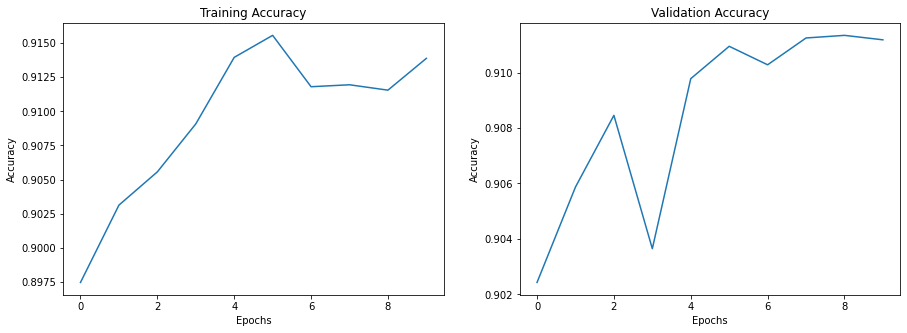

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(train_accuracies)
axs[0].set_title("Training Accuracy")
axs[0].set(xlabel="Epochs", ylabel="Accuracy")

axs[1].plot(val_accuracies)
axs[1].set_title("Validation Accuracy")
axs[1].set(xlabel="Epochs", ylabel="Accuracy")

In [ ]:
print('Checking the results of test dataset.')
accu_test = evaluate(test_dataloader)
print('Test Accuracy {:8.2f}'.format(accu_test*100))

Checking the results of test dataset.
Test Accuracy    91.12


In [ ]:
print('Class-wise Test Accuracy:')
classwise_accuracy(test_dataloader,2)

Class-wise Test Accuracy:
Accuracy of Class 1 : 90.98 %
Accuracy of Class 2 : 91.25 %


In [ ]:
amazon_reviews_label = {1: "Negative",
                 2: "Positive"}

def predict(text, text_pipeline):
    with torch.no_grad():
        text = torch.tensor(text_pipeline(text))
        output = model(text, torch.tensor([0]))
        return output.argmax(1).item() + 1

ex_text_str = "This was a good product"

model = model.to("cpu")

print("%s" %amazon_reviews_label[predict(ex_text_str, text_pipeline)])

Positive
